<a href="https://colab.research.google.com/github/LBarros77/Boot/blob/master/fetch_covtype.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Outras Métricas**

Treino - R²: 0.32, MSE: 1.33, MAE: 0.72, RMSE: 1.15
Teste  - R²: 0.32, MSE: 1.33, MAE: 0.72, RMSE: 1.15

Cross-validation - R²: -65130149742184718336.00, MSE: 89468883671850582016.00, MAE: 200909791.59, RMSE: 9458817732.61


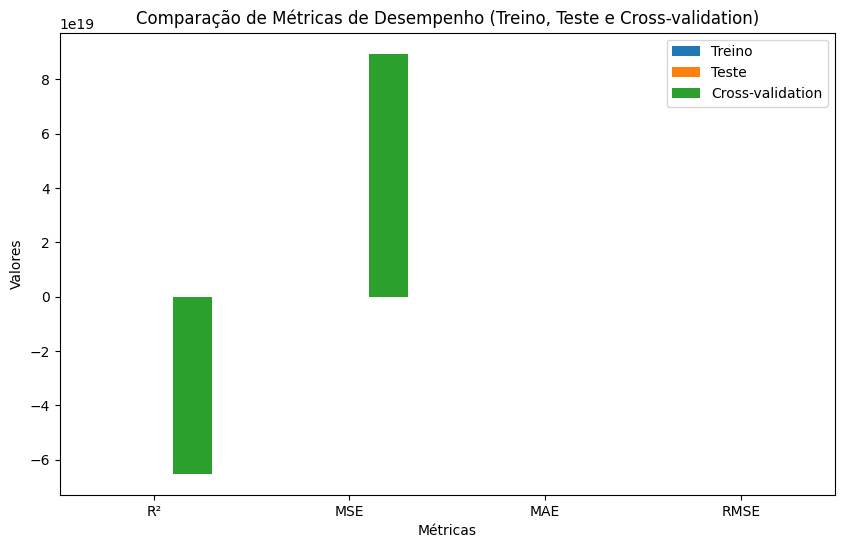

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# Load the dataset
covtype = fetch_covtype()
X = covtype.data
y = covtype.target

# Apply StandardScaler for feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics
def calculate_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return r2, mse, mae, rmse

r2_train, mse_train, mae_train, rmse_train = calculate_metrics(y_train, y_train_pred)
r2_test, mse_test, mae_test, rmse_test = calculate_metrics(y_test, y_test_pred)

# Cross-validation calc
r2_cv = cross_val_score(model, X, y, cv=5, scoring='r2').mean()
mse_cv = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error').mean()
mae_cv = -cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error').mean()
y_cv_pred = cross_val_predict(model, X, y, cv=5)
rmse_cv = np.sqrt(mean_squared_error(y, y_cv_pred))

# Print metrics
print(f"Treino - R²: {r2_train:.2f}, MSE: {mse_train:.2f}, MAE: {mae_train:.2f}, RMSE: {rmse_train:.2f}")
print(f"Teste  - R²: {r2_test:.2f}, MSE: {mse_test:.2f}, MAE: {mae_test:.2f}, RMSE: {rmse_test:.2f}")
print(f"\nCross-validation - R²: {r2_cv:.2f}, MSE: {mse_cv:.2f}, MAE: {mae_cv:.2f}, RMSE: {rmse_cv:.2f}")

# Plot results
metrics = ['R²', 'MSE', 'MAE', 'RMSE']
train = [r2_train, mse_train, mae_train, rmse_train]
test = [r2_test, mse_test, mae_test, rmse_test]
cross_validation = [r2_cv, mse_cv, mae_cv, rmse_cv]

x = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(x - 0.2, train, 0.2, label='Treino')
plt.bar(x, test, 0.2, label='Teste')
plt.bar(x + 0.2, cross_validation, 0.2, label='Cross-validation')

plt.xlabel('Métricas')
plt.ylabel('Valores')
plt.title('Comparação de Métricas de Desempenho (Treino, Teste e Cross-validation)')
plt.xticks(x, metrics)
plt.legend()
plt.show()